In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris()
X=iris.data[:, 2:] # 꽃잎의 가로, 세로 길이
y=iris.target

tree_clf=DecisionTreeClassifier(max_depth=2, random_state=10)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=10)

In [3]:
from sklearn.tree import export_graphviz

# 그래프 정보를 파일로 저장
export_graphviz(
    tree_clf,
    out_file='d:/data/iris/iris_tree.dot',
    feature_names=['petal length', 'petal width'],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

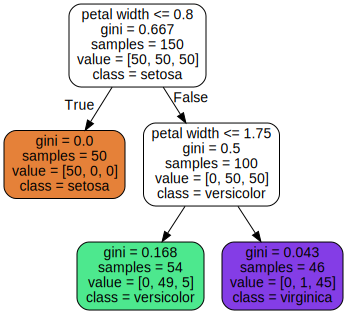

In [4]:
import graphviz
with open('d:/data/iris/iris_tree.dot') as f:
    dot_graph=f.read()
dot=graphviz.Source(dot_graph)
dot.format='png'
dot.render(filename='iris_tree', directory='d:/data/iris')
# d:/data/iris/iris_tree.png 파일이 생성됨
dot
# 트리 모형에서는 데이터 전처리가 거의 불필요함
# (스케일링 할 필요가 없음, 거리 기반의 알고리즘이 아닌 규칙 기반의 알고리즘)

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[0,7.5,0,3], iris=True, legend=False, plot_training=True):
    x1s=np.linspace(axes[0], axes[1], 100)
    x2s=np.linspace(axes[2], axes[3], 100)
    x1, x2=np.meshgrid(x1s, x2s)
    X_new=np.c_[x1.ravel(), x2.ravel()]
    y_pred=clf.predict(X_new).reshape(x1.shape)
    custom_cmap=ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2=ListedColormap(['#7d7d58', '#4c4c7f', '#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', label='Iris-Setosa')
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label='Iris-Versicolor')
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'g^', label='Iris-Virginica')
        plt.axis(axes)
    if iris:
        plt.xlabel('petal length', fontsize=14)
        plt.ylabel('petal width', fontsize=14)
    else:
        plt.xlabel(r'$x_1$', fontsize=18)
        plt.ylabel(r'$x_2$', fontsize=18, rotation=0)
    if legend:
        plt.legend(loc='lower right', fontsize=14)

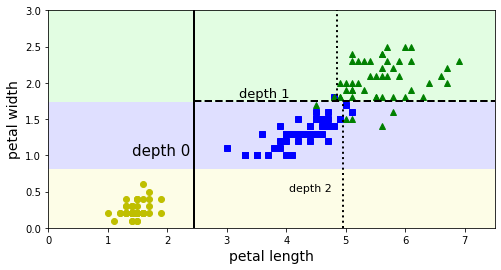

In [7]:
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45,2.45], [0,3], 'k-', linewidth=2)
plt.plot([2.45,7.5], [1.75,1.75], 'k--', linewidth=2)
plt.plot([4.95,4.95], [0,1.75], 'k:', linewidth=2)
plt.plot([4.85,4.85], [1.75,3], 'k:', linewidth=2)
plt.text(1.40, 1.0, "depth 0", fontsize=15)
plt.text(3.2, 1.80, "depth 1", fontsize=13)
plt.text(4.05, 0.5, "depth 2", fontsize=11)

plt.show()

In [9]:
# 분류라벨 확률추정함수
result=tree_clf.predict_proba([[5,1.5]])
print(result) # 0, 1, 2일 확률
print(np.argmax(result)) # 최댓값의 인덱스
print(tree_clf.predict([[5,1.5]]))

[[0.         0.90740741 0.09259259]]
1
[1]


In [10]:
# 가장 너비가 큰 Iris-Versicolor
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)]

array([[4.8, 1.8]])

In [11]:
# 위의 값을 제거한 데이터로 만든 모형
not_widest_versicolor=(X[:, 1]!=1.8) | (y==2)
X_tweaked=X[not_widest_versicolor]
y_tweaked=y[not_widest_versicolor]

tree_clf_tweaked=DecisionTreeClassifier(max_depth=2, random_state=10)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=10)

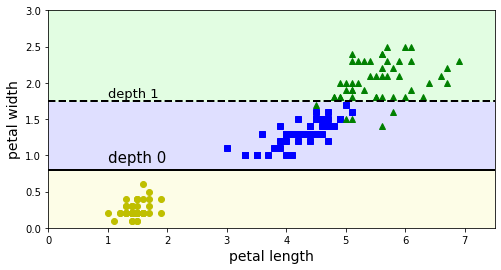

In [12]:
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0,7.5], [0.8,0.8], 'k-', linewidth=2)
plt.plot([0,7.5], [1.75,1.75], 'k--', linewidth=2)
plt.text(1.0, 0.9, "depth 0", fontsize=15)
plt.text(1.0, 1.8, "depth 1", fontsize=13)

plt.show()
# 앞에서 그린 그래프와 매우 다른 모양으로 출력됨

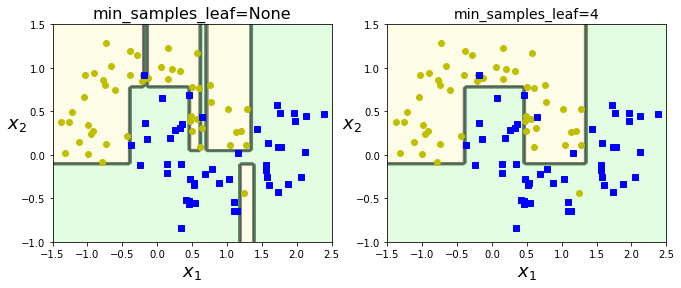

In [13]:
# min_samples_leaf : 리프 노드가 가지고 있어야 할 최소 샘플 수
from sklearn.datasets import make_moons

Xm, ym=make_moons(n_samples=100, noise=0.25, random_state=53)
deep_tree_clf1=DecisionTreeClassifier(random_state=10) # min_samples_leaf를 4로 제한하지 않은 모형
deep_tree_clf2=DecisionTreeClassifier(random_state=10, min_samples_leaf=4) # min_samples_leaf를 4로 제한
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5,2.5,-1,1.5], iris=False)
plt.title('min_samples_leaf=None', fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5,2.5,-1,1.5], iris=False)
plt.title(f'min_samples_leaf={deep_tree_clf2.min_samples_leaf}', fontsize=14)

plt.show()
# 왼쪽 모형은 과적합 상태의 모형, 오른쪽 모형이 좀 더 일반화된 모형

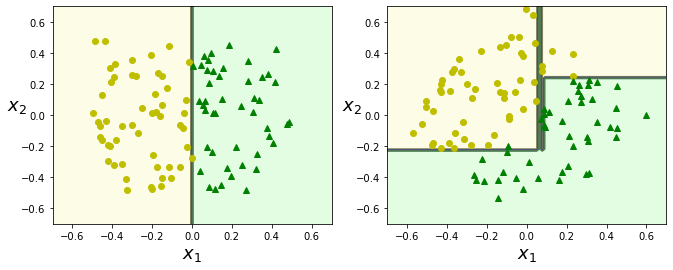

In [15]:
# 의사결정 나무모형의 단점 : 계단 모양의 결정 경계를 만들게 됨
np.random.seed(10)
Xs=np.random.rand(100,2) - 0.5
ys=(Xs[:, 0]>0).astype(np.float32)*2

angle=np.pi/4
rotation_matrix=np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr=Xs.dot(rotation_matrix)

tree_clf_s=DecisionTreeClassifier(random_state=10)
tree_clf_s.fit(Xs, ys)
tree_clf_sr=DecisionTreeClassifier(random_state=10)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()
# 오른쪽 그래프는 왼쪽의 원본 데이터를 45도 회전시킨 그래프
# 왼쪽 그래프는 비교적 간단한 규칙으로 데이터를 분류하지만 오른쪽 그래프는 다소 과적합 문제가 있음